# Predict bee image health

## Load the dataset as a dataframe

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bee_data.csv')

print(df.head())

          file     date   time        location  zip code subspecies  \
0  041_066.png  8/28/18  16:07  Alvin, TX, USA     77511         -1   
1  041_072.png  8/28/18  16:07  Alvin, TX, USA     77511         -1   
2  041_073.png  8/28/18  16:07  Alvin, TX, USA     77511         -1   
3  041_067.png  8/28/18  16:07  Alvin, TX, USA     77511         -1   
4  041_059.png  8/28/18  16:07  Alvin, TX, USA     77511         -1   

              health  pollen_carrying   caste  
0  hive being robbed            False  worker  
1  hive being robbed            False  worker  
2  hive being robbed            False  worker  
3  hive being robbed            False  worker  
4  hive being robbed            False  worker  


## Now we create a path column to out dataframe

In this column we will append the directory path to the image from this notebook

In [3]:
imgPath = "./bee_imgs/bee_imgs/"

In [4]:
df.reset_index()

for index, row in df.iterrows():
    fileName = row['file']
    df.loc[index,'path'] = imgPath+str(fileName)

Check if the new column named path has the correct path to the images

In [5]:
print(df.head())

          file     date   time        location  zip code subspecies  \
0  041_066.png  8/28/18  16:07  Alvin, TX, USA     77511         -1   
1  041_072.png  8/28/18  16:07  Alvin, TX, USA     77511         -1   
2  041_073.png  8/28/18  16:07  Alvin, TX, USA     77511         -1   
3  041_067.png  8/28/18  16:07  Alvin, TX, USA     77511         -1   
4  041_059.png  8/28/18  16:07  Alvin, TX, USA     77511         -1   

              health  pollen_carrying   caste                             path  
0  hive being robbed            False  worker  ./bee_imgs/bee_imgs/041_066.png  
1  hive being robbed            False  worker  ./bee_imgs/bee_imgs/041_072.png  
2  hive being robbed            False  worker  ./bee_imgs/bee_imgs/041_073.png  
3  hive being robbed            False  worker  ./bee_imgs/bee_imgs/041_067.png  
4  hive being robbed            False  worker  ./bee_imgs/bee_imgs/041_059.png  


## Split the values in train validate and test data

In [6]:
from sklearn.model_selection import train_test_split

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### We will split the data in three parts

These parts are going to be train, validate and test. We will use train to make the models, validate to choose the best one and test to see how good it really is.

In [7]:
codes, uniques = pd.factorize(df['health'])
df['facCat'] = codes

In [8]:
print(df)

             file     date   time           location  zip code subspecies  \
0     041_066.png  8/28/18  16:07     Alvin, TX, USA     77511         -1   
1     041_072.png  8/28/18  16:07     Alvin, TX, USA     77511         -1   
2     041_073.png  8/28/18  16:07     Alvin, TX, USA     77511         -1   
3     041_067.png  8/28/18  16:07     Alvin, TX, USA     77511         -1   
4     041_059.png  8/28/18  16:07     Alvin, TX, USA     77511         -1   
...           ...      ...    ...                ...       ...        ...   
5167  027_011.png  8/20/18  10:03  San Jose, CA, USA     95124         -1   
5168  027_007.png  8/20/18  10:03  San Jose, CA, USA     95124         -1   
5169  027_013.png  8/20/18  10:03  San Jose, CA, USA     95124         -1   
5170  027_012.png  8/20/18  10:03  San Jose, CA, USA     95124         -1   
5171  027_014.png  8/20/18  10:03  San Jose, CA, USA     95124         -1   

                 health  pollen_carrying   caste  \
0     hive being robbed

In [9]:
df_tv, df_test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['facCat'])

In [10]:
df_train, df_val = train_test_split(df_tv, test_size=0.2, random_state=42, stratify=df_tv['facCat'])

**This names list is important for creating the directorys for the images**

In [11]:
dataFrames = ["df_test", "df_train", "df_val"]

In [12]:
print(df_train)

              file     date   time              location  zip code  \
4405   038_094.png  8/18/18  12:30  Athens, Georgia, USA     30607   
851    030_607.png  8/17/18  17:50        Alvin, TX, USA     77511   
2977   010_854.png  8/19/18  12:46   Des Moines, IA, USA     50315   
1132   030_726.png  8/17/18  17:50        Alvin, TX, USA     77511   
4743  019_1355.png   8/6/18  19:19     Saratoga, CA, USA     95070   
...            ...      ...    ...                   ...       ...   
1857   040_487.png  8/21/18  15:56       Athens, GA, USA     30607   
4865  019_1265.png   8/6/18  19:19     Saratoga, CA, USA     95070   
4141   032_719.png  8/21/18   9:00   Des Moines, IA, USA     50315   
4059   032_578.png  8/21/18   9:00   Des Moines, IA, USA     50315   
4615   038_385.png  8/18/18  12:30  Athens, Georgia, USA     30607   

                 subspecies                      health  pollen_carrying  \
4405  1 Mixed local stock 2  Varroa, Small Hive Beetles            False   
851    

### New dataframes

We now have three dataframes, **df_test**, **df_train**, **df_val**.

### Factorize check

Now we also want to know which factorize number equals what state of health. We are going to find that out next.

In [13]:
uniqueHealths = pd.unique(df['health'])
print(uniqueHealths)

['hive being robbed' 'healthy' 'few varrao, hive beetles' 'ant problems'
 'missing queen' 'Varroa, Small Hive Beetles']


In [14]:
healthStates = {}

df.reset_index()

for index, row in df.iterrows():
    healthOfRow = row['health']
    if healthOfRow not in healthStates:
        healthStates[healthOfRow] = row['facCat']

print(healthStates)

{'hive being robbed': 0, 'healthy': 1, 'few varrao, hive beetles': 2, 'ant problems': 3, 'missing queen': 4, 'Varroa, Small Hive Beetles': 5}


### Start making out model

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import os

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### We first need to load all the images from the **df_train**

To do this we need to create a file structure where every dataframe is a file containing folders named after the health state and the images in the corresponding folders.

This is what we want to print

In [16]:
for x in dataFrames:
    print(x)
    for y in uniqueHealths:
        print("   " + x + '/' + y)

df_test
   df_test/hive being robbed
   df_test/healthy
   df_test/few varrao, hive beetles
   df_test/ant problems
   df_test/missing queen
   df_test/Varroa, Small Hive Beetles
df_train
   df_train/hive being robbed
   df_train/healthy
   df_train/few varrao, hive beetles
   df_train/ant problems
   df_train/missing queen
   df_train/Varroa, Small Hive Beetles
df_val
   df_val/hive being robbed
   df_val/healthy
   df_val/few varrao, hive beetles
   df_val/ant problems
   df_val/missing queen
   df_val/Varroa, Small Hive Beetles


In [17]:
for x in dataFrames:
    if not os.path.exists(x):
        try:
            os.mkdir(x)
        except FileExistsError:
            print("df directory " + x + " already exists")
    for y in uniqueHealths:
        if not os.path.exists(y):
            try:
                os.mkdir(x + '/' + y)
            except FileExistsError:
                print("health directory " + y + " in " + x + " already exists")

health directory hive being robbed in df_test already exists
health directory healthy in df_test already exists
health directory few varrao, hive beetles in df_test already exists
health directory ant problems in df_test already exists
health directory missing queen in df_test already exists
health directory Varroa, Small Hive Beetles in df_test already exists
health directory hive being robbed in df_train already exists
health directory healthy in df_train already exists
health directory few varrao, hive beetles in df_train already exists
health directory ant problems in df_train already exists
health directory missing queen in df_train already exists
health directory Varroa, Small Hive Beetles in df_train already exists
health directory hive being robbed in df_val already exists
health directory healthy in df_val already exists
health directory few varrao, hive beetles in df_val already exists
health directory ant problems in df_val already exists
health directory missing queen in df

In [18]:
import shutil

First we delete all the excisting files in the directorys. This is because if we run everything twice the train test split may differentiate.

In [19]:
for x in dataFrames:
    for y in uniqueHealths:
        folder = (x + '/' + y)
        for filename in os.listdir(folder):
            file_path = os.path.join(folder, filename)
            try:
                if os.path.isfile(file_path) or os.path.islink(file_path):
                    os.unlink(file_path)
                elif os.path.isdir(file_path):
                    shutil.rmtree(file_path)
            except Exception as e:
                print('Failed to delete %s. Reason: %s' % (file_path, e))

For every existing df we create a for loop, in the to path we specify in the first string which dataframe directory we need.

First we fill the **df_train** directory

In [20]:
df.reset_index()

for index, row in df_train.iterrows():
    fileName = row['file']
    fromPath = row['path']
    healthPath = row ['health']
    toPath = ("df_train" + '/' + healthPath + '/' + fileName)
    if not os.path.exists(toPath):
        shutil.copy(fromPath, toPath)

**df_val**

In [21]:
df.reset_index()

for index, row in df_val.iterrows():
    fileName = row['file']
    fromPath = row['path']
    healthPath = row ['health']
    toPath = ("df_val" + '/' + healthPath + '/' + fileName)
    if not os.path.exists(toPath):
        shutil.copy(fromPath, toPath)

**df_test**

In [22]:
df.reset_index()

for index, row in df_test.iterrows():
    fileName = row['file']
    fromPath = row['path']
    healthPath = row ['health']
    toPath = ("df_test" + '/' + healthPath + '/' + fileName)
    if not os.path.exists(toPath):
        shutil.copy(fromPath, toPath)

### Download the data into tf

3309 images in this directory
Look it's a bee!!!


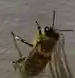

In [23]:
import pathlib

data_dir = pathlib.Path("./df_train")

image_count = len(list(data_dir.glob('*/*.png')))
print(str(image_count) + " images in this directory")

healthy = list(data_dir.glob('healthy/*'))
print("Look it's a bee!!!")
PIL.Image.open(str(healthy[0]))

In [24]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

3309


In [37]:
batch_size = 32
img_height = 180
img_width = 180

In [39]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3309 images belonging to 6 classes.


In [40]:
data_dir_val = pathlib.Path("./df_val")

In [41]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_val,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 828 images belonging to 6 classes.


In [43]:
class_names = train_ds.class_names
print(class_names)

NameError: name 'validation_generator' is not defined